In [1]:
import sys

import networkx as nx
import igraph as ig
from networkx.generators.community import LFR_benchmark_graph

import numpy as np
import time

import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 15
plt.rcParams["lines.linewidth"] = 3

#sys.path.append("/home/oriol/Documents/Trento/JacobianGeometry/Code/Dynamics_v2/")
sys.path.append("/Users/giacomobarzon/Desktop/Network_geometry/Code_8thJune/Dynamics_v2/")
#sys.path.append("/home/barzon/Network_geometry/Code_8thJune/Dynamics_v2/")

import CommonFunctions as cf
import plotter

import importlib
importlib.reload(cf)
importlib.reload(plotter)

<module 'plotter' from '/Users/giacomobarzon/Desktop/Network_geometry/Code_8thJune/Dynamics_v2/plotter.py'>

In [2]:
N = 60
mean_deg = 8

num_groups = 4; nodes_per_group = N//num_groups; kave = mean_deg; k_out = .15#kave is local average
k_in = kave - k_out
p_in = k_in/nodes_per_group
p_out = k_out/(nodes_per_group*num_groups - nodes_per_group)
print('Block model probs: in %f - out %f' % (p_in, p_out))

G_gn = nx.planted_partition_graph(num_groups, nodes_per_group, p_in, p_out, directed=False)

while nx.is_connected(G_gn) == 0:
    print('The network should be in a single component. New trial!')
    G_gn = nx.planted_partition_graph(num_groups, nodes_per_group, p_in, p_out, directed=False)

infoG_gn = ['GN',k_out]

print('Mean degree', np.mean(list(dict(G_gn.degree()).values())))

Block model probs: in 0.523333 - out 0.003333
The network should be in a single component. New trial!
Mean degree 7.366666666666666


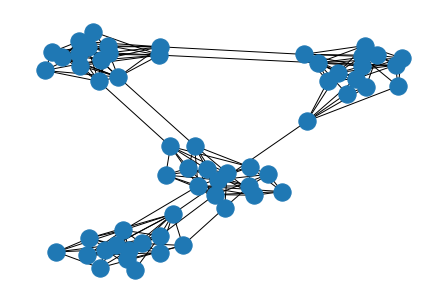

In [3]:
nx.draw(G_gn)

In [4]:
def Simu_diffu_params(G, infoG, dynamics, params, t_max = 1, t_n = 1):
    """
    Inputs: Network topology G
            infoG (list): Info about the network. infoG[0] = network_type; infoG[i>0] = parameters
            dynamic (any from  dynamics_list = ['Mutualistic', 'Biochemical', 'Population', 'Regulatory',
                                                 'Epidemics','Synchronization', 'Neuronal', 'NoisyVM'])
            kwargs: parameters of model
    """
    print('-------- GRAPH DISTANCES --------')
    start_time = time.time()
    
    num_nodes = G.number_of_nodes()
    #num_time_points = 50 # small to decrease computational load
    times = np.linspace(0, num_nodes, num = num_nodes+1) #time to find the steady state   
    times_perturbation = np.linspace(0, t_max*num_nodes, num = (num_nodes+1)*t_n) #times at which we look how the perturbation evolves
    
    if nx.is_connected(G) == 0:
        raise ValueError('The network should be in a single component. Exit!')
    
    dist_t = []
    avg_dist_t = []
    eigvals = []
    
    for param in params:
        ### DIFFUSION
        print('[*] JACOBIAN DISTANCE - PARAMS: '+str(param))
        
        #Integration to get the steady state
        print('Integration up to steady state...')
        initial_state = np.random.random(len(G.nodes()))   
        SteadyState_ref = cf.Numerical_Integration(G, dynamics, initial_state, times = times, fixed_node = 1e+6, show = 1, epsilon = 1, args = param)
        SteadyState_ref = SteadyState_ref[-1]
            
        # analytical expression of Jacobian
        print('Evaluating jacobian distance...')
        tmp_d = cf.Jacobian(G, dynamics, SteadyState_ref, times_perturbation, norm = True, return_snapshot=True, args = param)
        
        dist_t.append(tmp_d[0])
        avg_dist_t.append(tmp_d[1])
        eigvals.append(tmp_d[2])
    
    return dist_t, avg_dist_t, eigvals, times_perturbation

In [13]:
param_2 = [0.2, 0.4, 0.6, 0.8, 1.]
#param_1 = [0.2, 0.5, 1.]
param_1 = [0.5]
param = [[a, b] for a in param_1 for b in param_2]

param_1_name = 'B'
param_2_name = 'R/B'
param_name = [param_1_name+'='+str(a)+','+param_2_name+'='+str(b) for a in param_1 for b in param_2]
param_rows = [param_1_name+'='+str(a) for a in param_1]
param_cols = [param_2_name+'='+str(b) for b in param_2]

#dist_t, avg_dist_t, eigvals, times = Simu_diffu_params(G_gn, infoG_gn, param, t_max = 1, t_n = 1)

-------- GRAPH DISTANCES --------
[*] JACOBIAN DISTANCE - PARAMS: [0.5, 0.2]
Integration up to steady state...


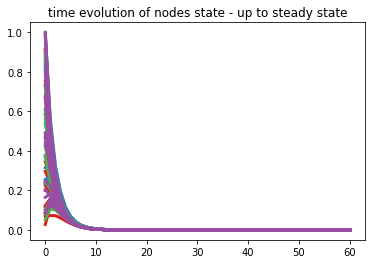

Evaluating jacobian distance...



[*] JACOBIAN DISTANCE - PARAMS: [0.5, 0.4]
Integration up to steady state...


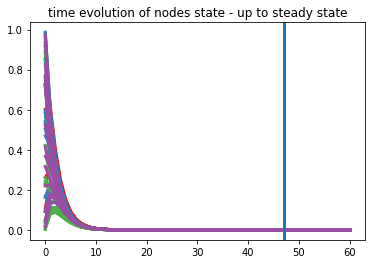

Evaluating jacobian distance...



[*] JACOBIAN DISTANCE - PARAMS: [0.5, 0.6]
Integration up to steady state...


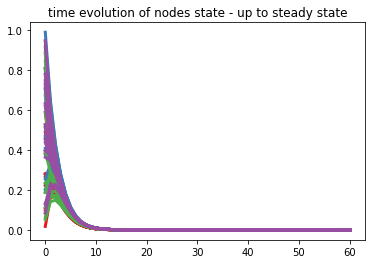

Evaluating jacobian distance...



[*] JACOBIAN DISTANCE - PARAMS: [0.5, 0.8]
Integration up to steady state...


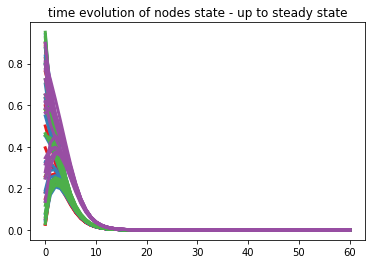

Evaluating jacobian distance...



[*] JACOBIAN DISTANCE - PARAMS: [0.5, 1.0]
Integration up to steady state...


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/giacomobarzon/Desktop/Network_geometry/Code_8thJune/Dynamics_v2/CommonFunctions.py:69: RuntimeWarning: overflow encountered in true_divide
  increments = np.sum( np.abs((xx[t]-xx[t-1])/xx[t]/delta_t) )
/Users/giacomobarzon/Desktop/Network_geometry/Code_8thJune/Dynamics_v2/CommonFunctions.py:69: RuntimeWarning: divide by zero encountered in true_divide
  increments = np.sum( np.abs((xx[t]-xx[t-1])/xx[t]/delta_t) )
/Users/giacomobarzon/Desktop/Network_geometry/Code_8thJune/Dynamics_v2/CommonFunctions.py:69: RuntimeWarning: invalid value encountered in true_divide
  increments = np.sum( np.abs((xx[t]-xx[t-1])/xx[t]/delta_t) )


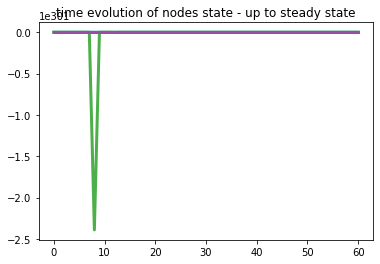

Evaluating jacobian distance...


In [14]:
dist_t, avg_dist_t, eigvals, times = Simu_diffu_params(G_gn, infoG_gn, 'DiffInt', param)

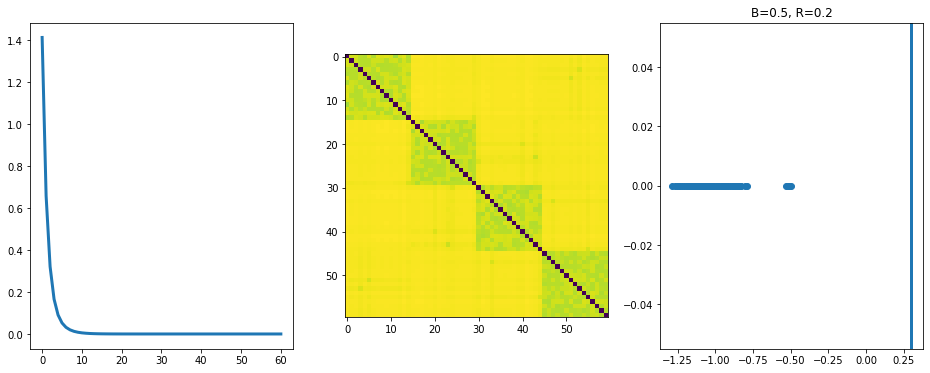

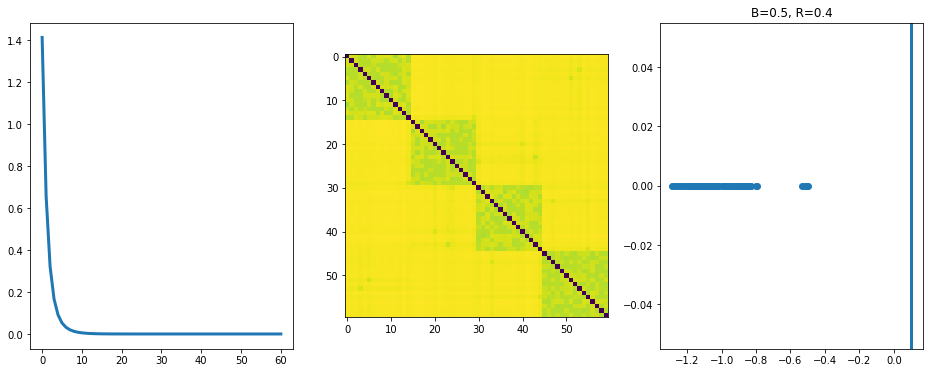

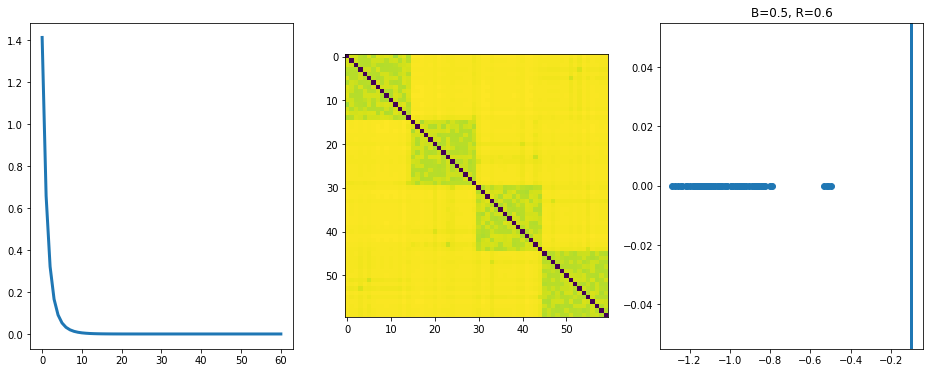

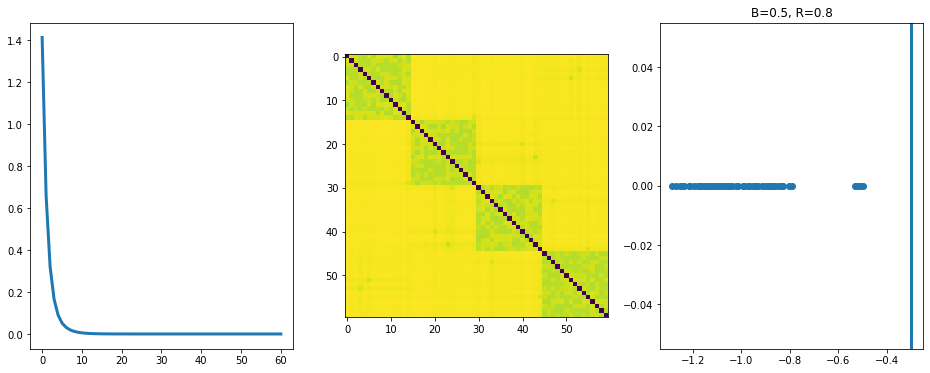

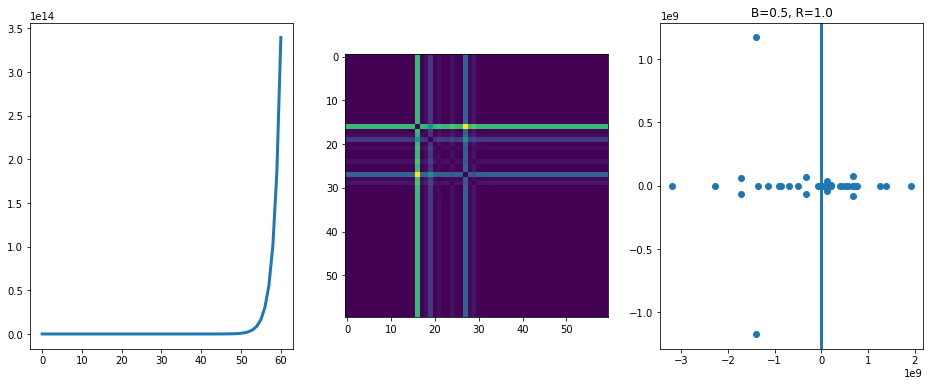

In [15]:
for i, param in enumerate(param):
    plt.figure(figsize=(16,6))
    
    ### Average distance vs time
    plt.subplot(1,3,1)
    plt.plot(times, dist_t[i])
    
    ### Average distance matrix
    plt.subplot(1,3,2)
    plt.imshow(cf.get_average_distance_matrix(avg_dist_t[i]))
    
    ### Eigvals
    plt.subplot(1,3,3)
    plt.plot(eigvals[i].real, eigvals[i].imag, 'o')
    plt.axvline(param[0]-param[1])
    
    plt.title('B='+str(param[0])+', R='+str(param[1]))
    
plt.show()

In [ ]:
dist_t